### 사전 준비

In [123]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mbl
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# 한글/차트 마이너스 깨짐현상 해결/ seaborn 한글설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [125]:
# 머신러닝 패키지 추가
import statsmodels.api as sm # 안쓸껄?
import sklearn as sk

### 전체 데이터로드

논어 길이, 무게 56개 샘플

In [152]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                                        21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                                        23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                                        27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                                        39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                                        44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                                        115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                                        150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                                        218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                                        556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                                        850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                                        1000.0])

#### 농어 길이와 무게간의 상관관계 확인

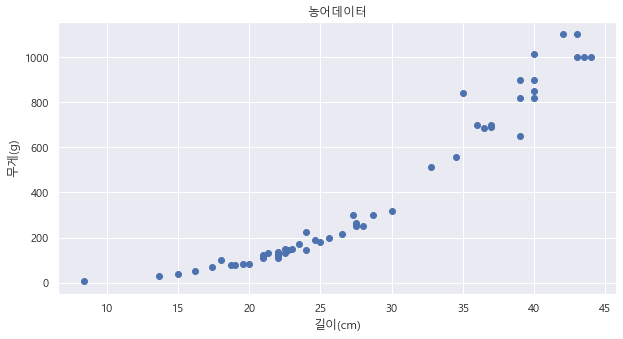

In [153]:
plt.figure(figsize=(10,5))
plt.scatter(x=perch_length, y=perch_weight) #  길이가 길면 무겁다는 당연한 이야기
plt.title('농어데이터')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

#### 훈련세트 테스트세트 분리

In [154]:
from sklearn.model_selection import  train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [155]:
# 훈련세트는 2차원 배열이어야 하는데,,,
train_input # 1차원 배열 -> 2차원 배열로 변경해야 sklearn 사용가능

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [156]:
train_target

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [157]:
# train_input = np.row_stack((train_input))
# train_input.shape

In [158]:
# test_input = np.row_stack((test_input))
# test_input.shape

In [159]:
# 2차원으로 형태변환
new_train_input = train_input.reshape(-1,1)

In [160]:
# 2차원으로 형태변환
new_test_input = test_input.reshape(-1,1)

In [113]:
# 2차원 형변환 2번째 방법
new_train_input = np.row_stack((train_input))
new_train_input.shape

(42, 1)

In [114]:
new_test_input = np.row_stack((test_input))
new_test_input.shape

(14, 1)

In [83]:
print(new_train_input.shape, new_test_input.shape)

(42, 1) (14, 1)


## 결정계수($R^2$)

- Tex문법

In [161]:
from sklearn.neighbors import  KNeighborsRegressor

In [162]:
Knr = KNeighborsRegressor( )
# KNN 훈련 : 반드시 훈련세트는 2차원배열 되어야 함!
Knr.fit(X=new_train_input, y=train_target)

KNeighborsRegressor()

In [163]:
# 테스트시에도 x값은 2차원배열 되어야 함!
Knr.score(X=new_test_input, y=test_target)
# 결정계수 = 0.9928

0.992809406101064

### MAE
Mean Absolute Error

In [164]:
from sklearn.metrics import  mean_absolute_error

# 테스트 세트에 대한 예측을 만듦
test_pred = Knr.predict(X=new_test_input)

In [165]:
# 실제 테스트할 농어 길이리스트
new_test_input

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [166]:
# 실제 측정된 농어 무게리스트
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [167]:
# 예측된 무게리스트
test_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [168]:
# 테스트 타겟세트에 대한 평균 절대값 오차(MAE)를 계산
mae = mean_absolute_error(y_true=test_target, y_pred=test_pred)
mae

19.157142857142862

결과에서 예측이 평균적으로 19.15g 정도 타깃값과 다르게 예측되었음

#### 과소적합(underfitting)

- 훈련세트보다 테스트세트의 데스팅결과(결정계수값)가 더 좋을 경우
- 훈련세트와 테스트세트의 결정계수값이 모두 낮은 경우

In [170]:
# 테스트로 결정계수
Knr.score(X=new_test_input, y=test_target)

0.992809406101064

In [172]:
# 테스트로 결정계수
Knr.score(X=new_train_input, y=train_target)

0.9698823289099254

#### 과대적합(overfitting)

- 훈련세트로 나온 결정계수는 매우 좋음, 근데 테스트세트에서 나온 결정계수가 매우 나쁠때 

### 현재의 과소적합 문제를 해결할 방법

모델을 조금더 복잡하게 만들면 된다 -> n_neighbors 기본 5

In [175]:
# 최근접 이웃의 갯수를 줄임
Knr.n_neighbors = 3 # 원래 5

# 재훈련
Knr.fit(X=new_train_input, y=train_target)
Knr.score(X=new_test_input, y=test_target)

0.9746459963987609

In [176]:
Knr.score(X=new_train_input, y=train_target)
# 과소적합 문제을 해결함

0.9804899950518966

### 확인문제

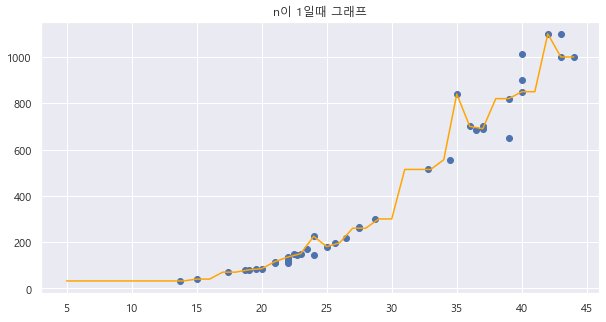

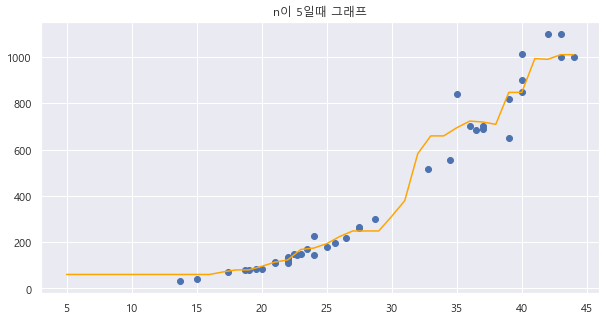

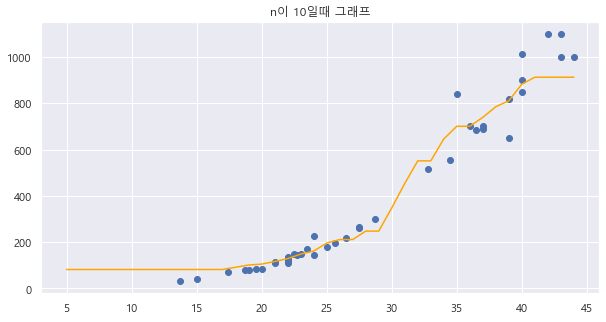

In [183]:
# KNN 회귀 객체를 만듦
Knr = KNeighborsRegressor()
# 5~45까지 x좌표를 생성
x = np.arange(5,45).reshape(-1,1)

# k-이웃값을 1,5,10으로 변경하면서 예측을 하고 차트그리기
for n in [1,5,10]:
    Knr.n_neighbors = n
    Knr.fit(X=new_train_input, y=train_target)

    # x에 대한 예측 도출
    pred = Knr.predict(X=x)
    # 훈련세트와 예측결과를 산점도에 표시
    plt.figure(figsize=(10,5))
    plt.scatter(x=new_train_input, y=train_target)
    plt.plot(x, pred, color='orange')
    title = f'농어데이터/ 이웃값이 {n}일때 그래프'
    if n ==1:
        title += '(과대적합)'
    if n ==10:
        title += '(과소적합)'
    plt.title(f'n이 {n}일때 그래프')
    plt.show()
